## Packages

### Install

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install boruta

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install -U statsmodels

Note: you may need to restart the kernel to use updated packages.


### Import

In [11]:
import numpy as np # for scientific computing
import pandas as pd # a fundamental and powerful package for data analysis and manipulation
import seaborn as sns # seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import pyreadstat # for reading .sav file
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, LeaveOneOut, train_test_split # for separating train and test data, scaling, model building, ...
from scipy import stats # it contains a large number of statistics, probability distributions functions
import matplotlib.pyplot as plt # matplotlib is a library to plot graphs in Python
from sklearn.impute import KNNImputer # Imputation for completing missing values using k-Nearest Neighbors
from sklearn.experimental import enable_iterative_imputer # Enables IterativeImputer. The API and results of this estimator might change without any deprecation cycle
from sklearn.impute import IterativeImputer # Multivariate imputer that estimates each feature from all the others. A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion
from sklearn.ensemble import RandomForestClassifier # A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting
from boruta import BorutaPy # Boruta is an all relevant feature selection method, while most other are minimal optimal; this means it tries to find all features carrying information usable for prediction, rather than finding a possibly compact subset of features on which some classifier has a minimal error
from imblearn.over_sampling import SMOTE # Implementation of SMOTE - Synthetic Minority Over-sampling Technique
from collections import Counter # A Counter is a container that keeps track of how many times equivalent values are added
from sklearn.metrics import plot_confusion_matrix # plot confusion matrix
from sklearn.metrics import accuracy_score # Accuracy classification score
from sklearn.model_selection import cross_val_score # Evaluate a score by cross-validation
from sklearn.metrics import classification_report # Build a text report showing the main classification metrics.
from sklearn import preprocessing # provides the StandardScaler utility class, which is a quick and easy way to perform operations
from sklearn.preprocessing import StandardScaler # To normalize the data for KNNImputer
from sklearn.manifold import TSNE # To visualize high dimensional data
from collections import Counter # To save the counted values as dict keys


## 1. Read Data

In [12]:
# reading data as a data frame, setting ID as the index and getting the number of rows and columns
#df = pd.DataFrame(pd.read_spss("../data/secom_mod.SAV"))
df = pd.read_spss(r'C:\Users\s0576758\Desktop\HTW\Data Mining - Tilo\secom_mod.SAV')
df = df.set_index('ID')
df.shape

(1567, 592)

## 2. Explore data

#### 2.1. Shape and type

In [13]:
# shape of the data set
print('Shape: ',df.shape)  

Shape:  (1567, 592)


In [14]:
# checking data types of the features
print(df.info(),"\n")
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1567 entries, 1.0 to 1567.0
Columns: 592 entries, class to feature590
dtypes: float64(591), object(1)
memory usage: 7.1+ MB
None 

class         float64
timestamp      object
feature001    float64
feature002    float64
feature003    float64
               ...   
feature586    float64
feature587    float64
feature588    float64
feature589    float64
feature590    float64
Length: 592, dtype: object


#### 2.2. Duplicates

In [15]:
# Check for duplicated rows
df.duplicated().any()

False

In [16]:
#Check for duplicated columns
#df.columns.duplicated().any()

#### 2.3. Pass / Fail ratio

In [17]:
# number of pass and fail values
df['class'].value_counts()

0.0    1472
1.0      95
Name: class, dtype: int64

In [18]:
# pie chart of the target variable
def ClassDistributionGraph(df, title):
    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
    
    labels = ['Pass', 'Fail']
    distribution = df.value_counts()
    colors = ['lightblue', 'yellowgreen']

    # Plot
    plt.pie(distribution, labels=labels, colors=colors, autopct= lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*distribution.sum()), shadow=True, startangle=140,)
    plt.title(title, fontsize=15)
    plt.axis('equal')
    plt.show()

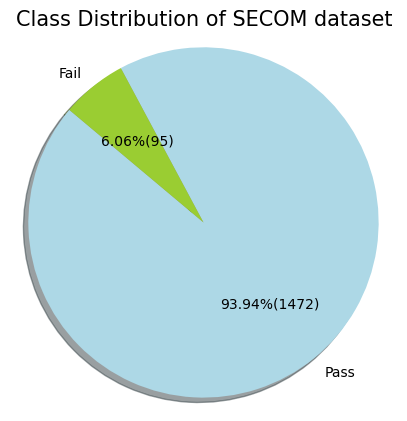

In [19]:
ClassDistributionGraph(df['class'], 'Class Distribution of SECOM dataset')

#### 2.4. Histogram of features

23 9 8 3


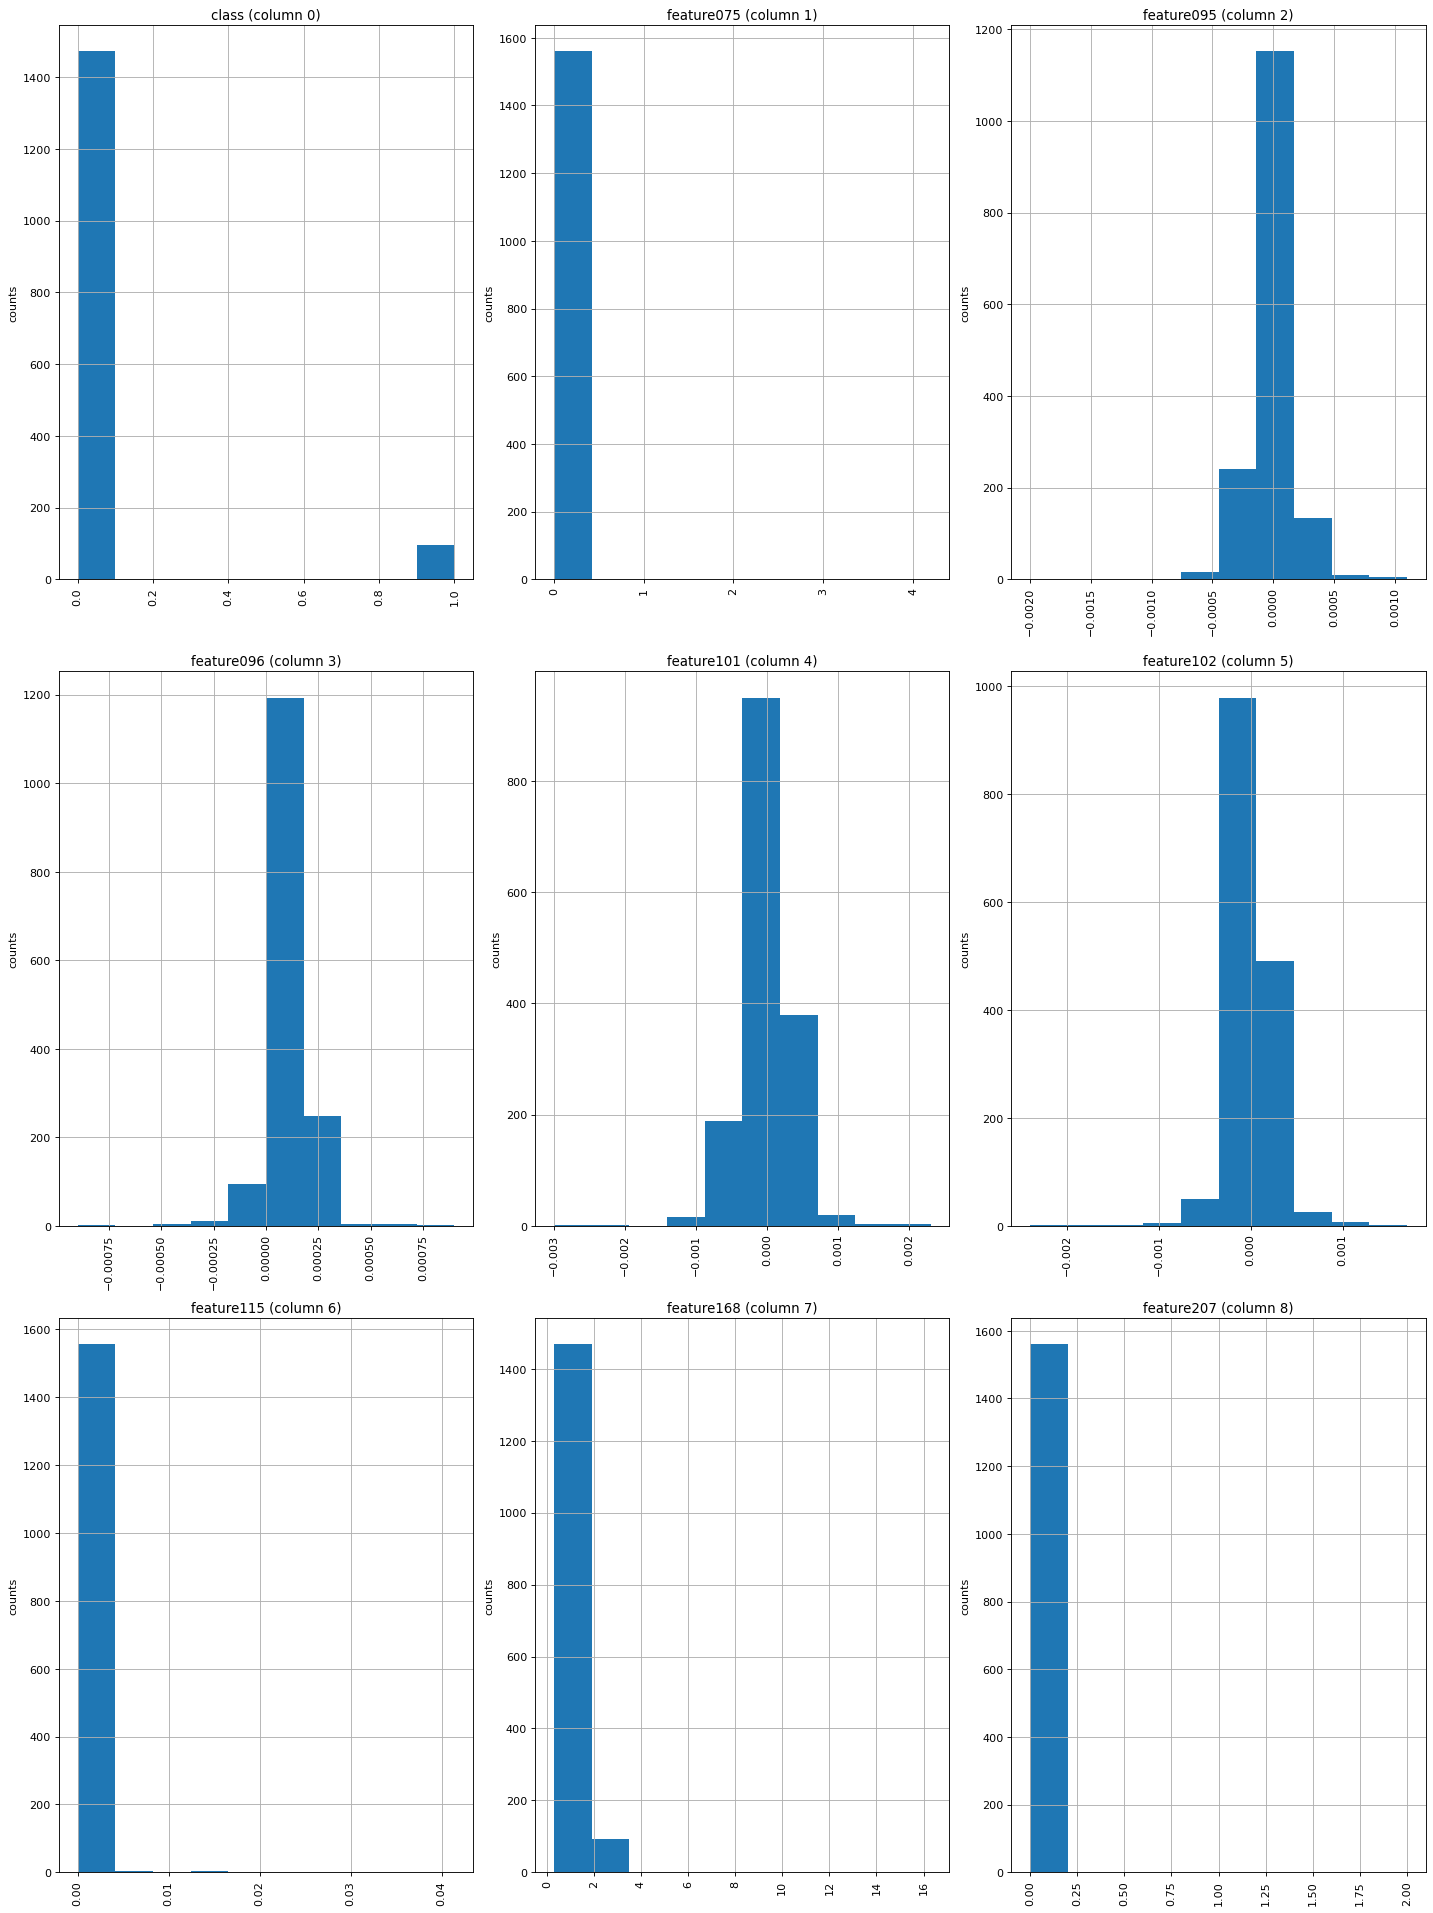

In [20]:
# histogram of some of the features
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})
 
    
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    %matplotlib inline
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
   
    print(nCol, nGraphShown, nGraphRow, nGraphPerRow)
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plotPerColumnDistribution(df, 9, 3)

#### 2.5. Correlation

In [21]:
# Correlation Histogram

def correlation(df):
    cor_matrix = pd.DataFrame(df.corr())

    # Remove reuntant values by selecting only the upper correlation triangle
    upper_tri = pd.DataFrame(cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool)))

    # Convert the upper correlation triangle to a Series
    corlist = pd.Series(upper_tri.values.ravel('F'))

    # Correlation Histogram
    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

    # Plot Histogram on x
    plt.hist(corlist, bins =50)
    plt.gca().set(title='Frequency Histogram of Correlation', ylabel='Frequency', xlabel='Correlation coefficient');

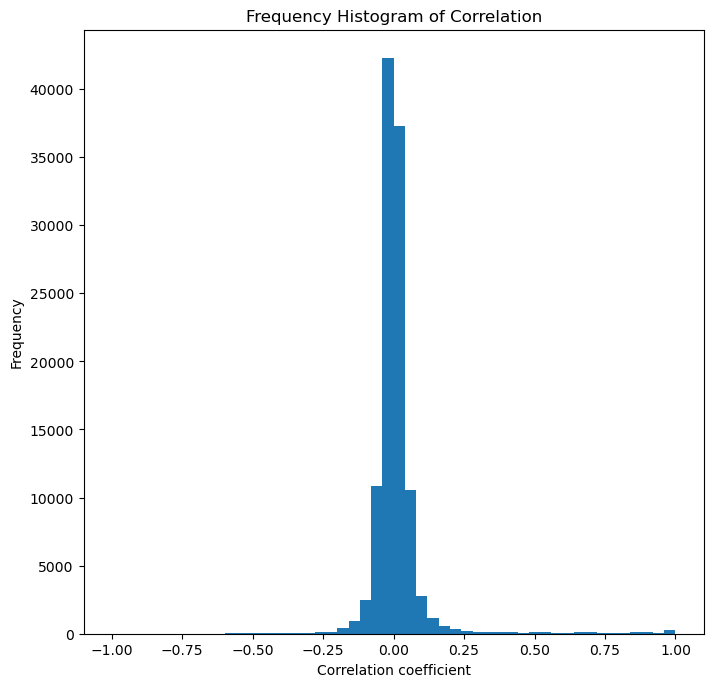

In [22]:
correlation(df)

#### 2.6. Missing values

In [23]:
# Total number of Nan values in the dataframe
df.isna().sum().sum()

41951

In [24]:
#number of cols with Nan values
nan_cols = [i for i in df.columns if df[i].isnull().any()]
print('number of columns with missing values = ', len(nan_cols))

#number of rows with Nan values
nan_rows = df.apply(lambda x: sum(x.isnull().values), axis = 1) # For rows
print('number of rows with missing values = ', len(nan_rows))

number of columns with missing values =  538
number of rows with missing values =  1567


## 3. Preprocessing

In [25]:
# Give text labels to the training examples
df['class'] = df['class'].replace({0: "PASS", 1: "FAIL"})
df.tail()

,class,timestamp,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,
1563.0,PASS,16/10/2008 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,...,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1564.0,PASS,16/10/2008 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,...,NaN,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1565.0,PASS,17/10/2008 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,...,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1566.0,PASS,17/10/2008 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,...,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941
1567.0,PASS,17/10/2008 06:07:00,2944.92,2450.76,2195.4444,2914.1792,1.5978,100.0,85.1011,0.1235,...,0.0045,137.7844,0.4987,0.0181,0.0040,3.6275,0.0117,0.0162,0.0045,137.7844


## 4. Data Preparation

### 4.1.Splitting Traninig and Test Data

In [26]:
# Split df into X and y
y = df['class']
X = df.drop('class', axis=1)

In [27]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle=True, random_state=40, stratify=y)

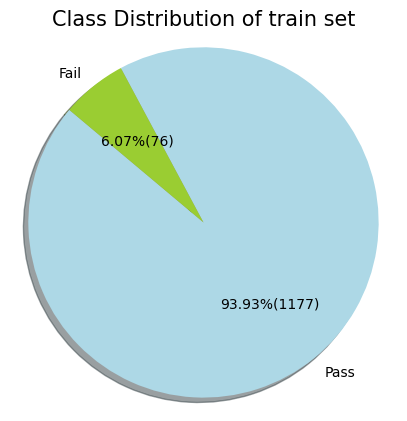

In [28]:
# pie chart for the train set
ClassDistributionGraph(y_train, 'Class Distribution of train set')

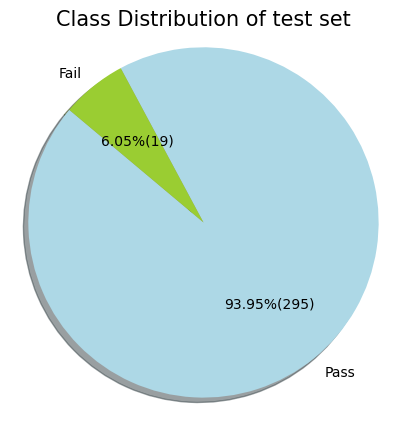

In [29]:
# pie chart for the test set
ClassDistributionGraph(y_test, 'Class Distribution of test set')

### 4.2 Rough feature reduction

#### 4.2.1 Removal of timestamp

In [30]:
# removing timestamp
X_train= X_train.drop(columns='timestamp')

#### 4.2.2 Removal of constants

In [31]:
#columns that have the same value excluding nan
print(len(X_train.columns[X_train.nunique() == 1]))

#column names with same value in it
X_train.columns[X_train.nunique() == 1]
print(list(X_train.columns[X_train.nunique() == 1]))

#remove these columns since it adds no value
single_value_columns = list(X_train.columns[X_train.nunique() == 1])
X_train=X_train.drop(columns=single_value_columns)
X_train

116
['feature006', 'feature014', 'feature043', 'feature050', 'feature053', 'feature070', 'feature098', 'feature142', 'feature150', 'feature179', 'feature180', 'feature187', 'feature190', 'feature191', 'feature192', 'feature193', 'feature194', 'feature195', 'feature227', 'feature230', 'feature231', 'feature232', 'feature233', 'feature234', 'feature235', 'feature236', 'feature237', 'feature238', 'feature241', 'feature242', 'feature243', 'feature244', 'feature257', 'feature258', 'feature259', 'feature260', 'feature261', 'feature262', 'feature263', 'feature264', 'feature265', 'feature266', 'feature267', 'feature277', 'feature285', 'feature314', 'feature315', 'feature316', 'feature323', 'feature326', 'feature327', 'feature328', 'feature329', 'feature330', 'feature331', 'feature365', 'feature370', 'feature371', 'feature372', 'feature373', 'feature374', 'feature375', 'feature376', 'feature379', 'feature380', 'feature381', 'feature382', 'feature395', 'feature396', 'feature397', 'feature398', '

,feature001,feature002,feature003,feature004,feature005,feature007,feature008,feature009,feature010,feature011,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,
567.0,3023.07,2484.55,2242.8555,1430.7270,0.8832,106.2100,0.1216,1.5613,-0.0028,0.0008,...,NaN,NaN,0.4979,0.0165,0.0041,3.3098,0.0184,0.0127,0.0037,68.7057
1261.0,2953.63,2384.04,2191.2111,1437.5003,2.2073,97.6444,0.1235,1.3584,-0.0024,-0.0048,...,NaN,NaN,0.4968,0.0188,0.0041,3.7853,0.0137,0.0326,0.0108,237.4625
1041.0,3021.61,2440.29,2227.2222,2043.5876,1.1892,95.5267,0.1253,1.5335,-0.0083,-0.0095,...,NaN,NaN,0.5091,0.0123,0.0031,2.4116,0.0437,0.0200,0.0074,45.7019
1181.0,3093.46,2479.17,2221.3667,2490.6947,1.2667,88.6578,0.1220,1.3537,0.0134,-0.0039,...,NaN,NaN,0.5006,0.0148,0.0036,2.9659,0.0190,0.0150,0.0045,78.6525
611.0,3010.40,NaN,2172.4000,1148.4101,1.2614,102.4522,0.1227,1.3843,-0.0010,-0.0004,...,NaN,NaN,0.5015,0.0137,0.0034,2.7339,0.0252,0.0157,0.0046,62.3881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806.0,2952.31,2453.53,2188.7222,1325.5230,1.1721,105.1700,0.1250,1.4480,-0.0233,0.0087,...,NaN,NaN,0.4949,0.0155,0.0034,3.1238,0.0253,0.0058,0.0018,22.7661
1101.0,2880.58,2489.76,2256.6000,2365.4787,1.1384,85.4278,0.1205,1.6114,0.0484,0.0043,...,0.0076,50.7949,0.5032,0.0117,0.0029,2.3282,0.0398,0.0202,0.0076,50.7949
1469.0,2968.78,2451.53,2207.1000,1298.4309,1.0251,96.9478,0.1203,1.3985,-0.0105,-0.0140,...,0.0084,185.3578,0.4972,0.0133,0.0036,2.6718,0.0167,0.0310,0.0084,185.3578


#### 4.2.3. Checking for columns more than 55% nan values

In [32]:
# count the number of missing values for each column
num_missing = pd.DataFrame((X_train.isna()).sum())
print(num_missing.sort_values(0))

               0
feature360     0
feature223     0
feature224     0
feature249     0
feature250     0
...          ...
feature359  1078
feature294  1140
feature158  1140
feature159  1140
feature293  1140

[474 rows x 1 columns]


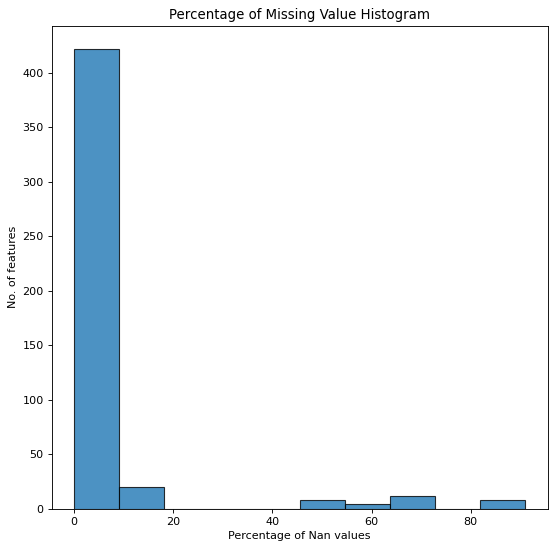

In [33]:
# Missing Value histogram
nan_perc = pd.DataFrame(round((X_train.isnull().sum() * 100/ len(X_train)),2))
nan_perc = nan_perc.reset_index()
nan_perc = nan_perc.rename({'index': 'feature', 0: 'percentage'}, axis=1)

%matplotlib inline
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':80})
n,bins,patch = plt.hist(nan_perc['percentage'],bins=10, alpha=0.8, label='Value', edgecolor='black', linewidth=1)
plt.gca().set(title='Percentage of Missing Value Histogram', ylabel='No. of features', xlabel='Percentage of Nan values');
plt.show()

In [34]:
# Defining a threshold to remove the values above it
threshold= 0.55
pct_null = X_train.isnull().sum() / len(X_train)
missing_value_cols = pct_null[pct_null >= threshold].index

# number of features containing more than 55% missing values
print(len(missing_value_cols))
print(missing_value_cols)

X_train = X_train.drop(missing_value_cols, axis=1)

24
Index(['feature086', 'feature110', 'feature111', 'feature112', 'feature158',
       'feature159', 'feature221', 'feature245', 'feature246', 'feature247',
       'feature293', 'feature294', 'feature359', 'feature383', 'feature384',
       'feature385', 'feature493', 'feature517', 'feature518', 'feature519',
       'feature579', 'feature580', 'feature581', 'feature582'],
      dtype='object')


#### 4.2.5. Less volatile

In [35]:
# Exploring  remaining features
summary = X_train.iloc[:,:].describe(include='all')

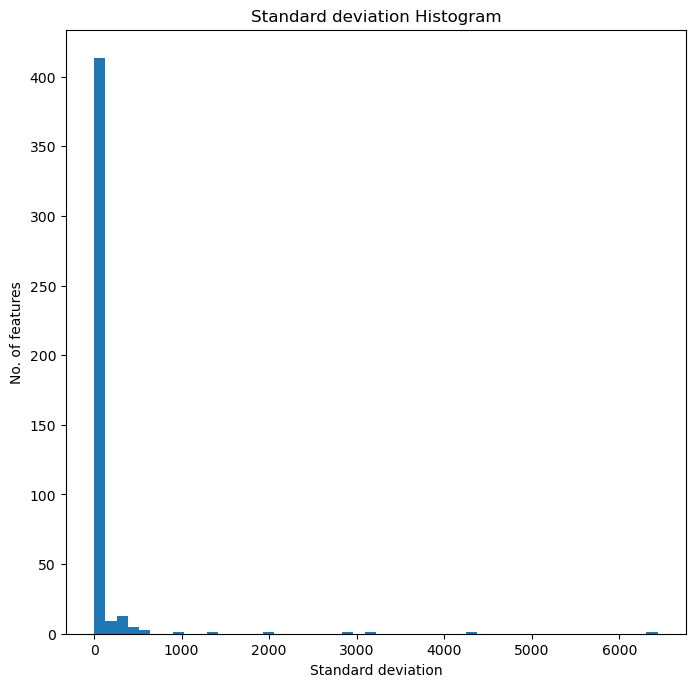

In [36]:
# Checking std of remaining features

def StandardDeviation(df):
    import matplotlib.pyplot as plt

    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

    plt.hist(df.std(), bins = 50)
    plt.gca().set(title='Standard deviation Histogram', ylabel='No. of features', xlabel='Standard deviation');
    plt.show()
    
StandardDeviation(X_train)

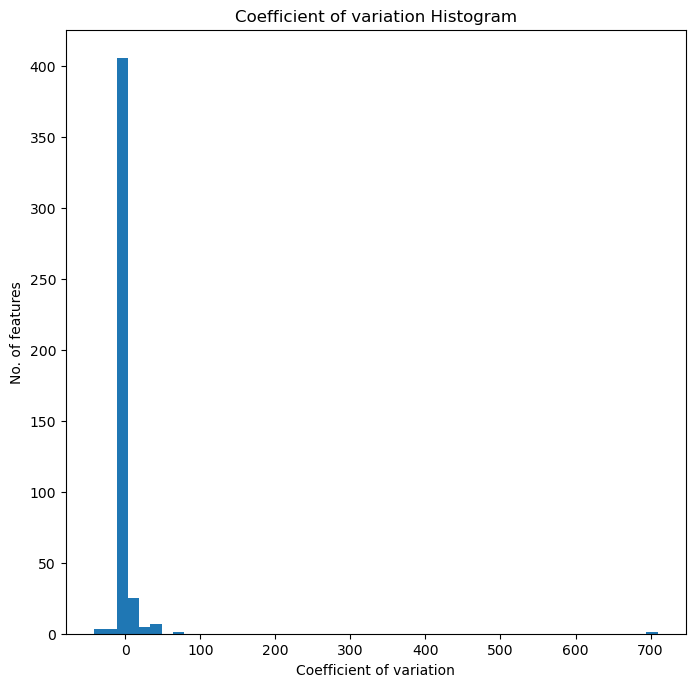

In [37]:
# Checking coeff std of remaining features
def CoefficientOfVariation(df):
    %matplotlib inline
    plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

    plt.hist(df.std()/df.mean(), bins = 50)
    plt.gca().set(title='Coefficient of variation Histogram', ylabel='No. of features', xlabel='Coefficient of variation');
    plt.show()

CoefficientOfVariation(X_train)

<AxesSubplot:>

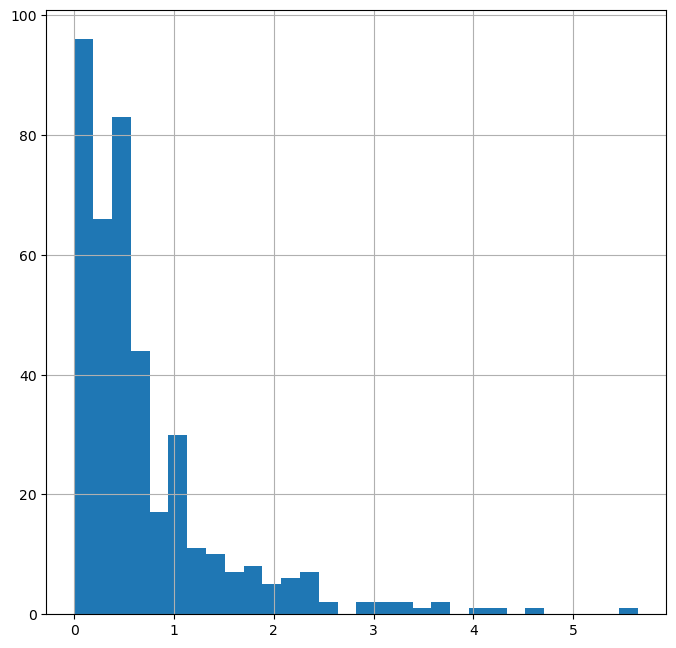

In [38]:
# histogram of the coefficient standard deviation of a percentage of features with the least coeffstd
feature_coeffstd = pd.DataFrame(summary.loc['std',:]/abs(summary.loc['mean',:])).sort_values(by=[0])
percentage_features = int(len(feature_coeffstd)*90/100)
feature_coeffstd.iloc[0:percentage_features,0].hist(bins=30)

In [39]:
# a percentage of features with the least coeffstd to remove
percentageToAnalyze = 5

percentage_features_rm = int(len(feature_coeffstd)*percentageToAnalyze/100)
feature_index = feature_coeffstd.index
features_least_volatile = feature_index[0:percentage_features_rm+1]
print("Number of least Volatiles", len(features_least_volatile))
print(features_least_volatile)

Number of least Volatiles 23
Index(['feature132', 'feature058', 'feature038', 'feature039', 'feature122',
       'feature134', 'feature583', 'feature124', 'feature125', 'feature057',
       'feature120', 'feature056', 'feature117', 'feature054', 'feature021',
       'feature055', 'feature088', 'feature548', 'feature114', 'feature003',
       'feature018', 'feature012', 'feature119'],
      dtype='object')


In [40]:
# dropping a percentage of features with the least coeffstd
X_train.drop(features_least_volatile, axis = 1, inplace = True)

In [41]:
X_train

,feature001,feature002,feature004,feature005,feature007,feature008,feature009,feature010,feature011,feature013,...,feature576,feature577,feature578,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,
567.0,3023.07,2484.55,1430.7270,0.8832,106.2100,0.1216,1.5613,-0.0028,0.0008,197.4289,...,0.1153,1.1395,17.5289,0.0165,0.0041,3.3098,0.0184,0.0127,0.0037,68.7057
1261.0,2953.63,2384.04,1437.5003,2.2073,97.6444,0.1235,1.3584,-0.0024,-0.0048,199.4944,...,0.2767,86.7573,91.1106,0.0188,0.0041,3.7853,0.0137,0.0326,0.0108,237.4625
1041.0,3021.61,2440.29,2043.5876,1.1892,95.5267,0.1253,1.5335,-0.0083,-0.0095,198.3405,...,0.1100,1.5180,16.7005,0.0123,0.0031,2.4116,0.0437,0.0200,0.0074,45.7019
1181.0,3093.46,2479.17,2490.6947,1.2667,88.6578,0.1220,1.3537,0.0134,-0.0039,199.2506,...,0.0940,1.4926,14.3055,0.0148,0.0036,2.9659,0.0190,0.0150,0.0045,78.6525
611.0,3010.40,NaN,1148.4101,1.2614,102.4522,0.1227,1.3843,-0.0010,-0.0004,198.2033,...,0.1288,1.6264,23.2761,0.0137,0.0034,2.7339,0.0252,0.0157,0.0046,62.3881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806.0,2952.31,2453.53,1325.5230,1.1721,105.1700,0.1250,1.4480,-0.0233,0.0087,203.7087,...,0.1306,1.7048,16.6976,0.0155,0.0034,3.1238,0.0253,0.0058,0.0018,22.7661
1101.0,2880.58,2489.76,2365.4787,1.1384,85.4278,0.1205,1.6114,0.0484,0.0043,198.1248,...,0.0868,1.6892,14.6674,0.0117,0.0029,2.3282,0.0398,0.0202,0.0076,50.7949
1469.0,2968.78,2451.53,1298.4309,1.0251,96.9478,0.1203,1.3985,-0.0105,-0.0140,196.8639,...,0.1441,1.3708,18.3819,0.0133,0.0036,2.6718,0.0167,0.0310,0.0084,185.3578


### 4.3 Outlier Identification

In [42]:
# Funtion for Outlier treatment
def Outlier(X, outlier_treatment) :
    
    if outlier_treatment == 'NaN' :
        # calculating the z score of the values
        z_train= pd.DataFrame(stats.zscore(X,nan_policy='omit'))
        z_train

        # calculating the number of outliers
        print('Number of Outliers : ',sum(z_train.apply(lambda x: sum(x.apply(lambda x: 1 if abs(x)>3 else 0)))))

        #Outlier treatment : replacing outliers with NA to impute all NA values
        is_outlier = abs(z_train)>3
        is_outlier.columns = X.columns
        is_outlier.index = X.index
        return(X.mask(is_outlier, np.nan))
    
    elif outlier_treatment == '3s':
        boundary = 3
        scaler = preprocessing.StandardScaler()
        X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns)
        X = X.apply(lambda x : [y if y < boundary or np.isnan(y) else boundary for y in x])
        X = X.apply(lambda x : [y if y > -1*boundary or np.isnan(y) else -1*boundary for y in x])
        
        # for inverse transformation
        X_inverse = pd.DataFrame(scaler.inverse_transform(X))
        X_inverse.columns = X.columns
        return(X_inverse)




In [43]:
# Outlier treatment with NA values
X_train = Outlier(X_train, 'NaN')

Number of Outliers :  4724


In [44]:
#X_train = Outlier(X_train, '3s')

In [45]:
X_train

,feature001,feature002,feature004,feature005,feature007,feature008,feature009,feature010,feature011,feature013,...,feature576,feature577,feature578,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,
567.0,3023.07,2484.55,1430.7270,0.8832,106.2100,0.1216,1.5613,-0.0028,0.0008,197.4289,...,0.1153,1.1395,17.5289,0.0165,0.0041,3.3098,0.0184,0.0127,0.0037,68.7057
1261.0,2953.63,2384.04,1437.5003,2.2073,97.6444,0.1235,1.3584,-0.0024,-0.0048,199.4944,...,0.2767,NaN,NaN,0.0188,0.0041,3.7853,0.0137,0.0326,0.0108,237.4625
1041.0,3021.61,2440.29,2043.5876,1.1892,95.5267,0.1253,1.5335,-0.0083,-0.0095,198.3405,...,0.1100,1.5180,16.7005,0.0123,0.0031,2.4116,0.0437,0.0200,0.0074,45.7019
1181.0,3093.46,2479.17,2490.6947,1.2667,88.6578,0.1220,1.3537,0.0134,-0.0039,199.2506,...,0.0940,1.4926,14.3055,0.0148,0.0036,2.9659,0.0190,0.0150,0.0045,78.6525
611.0,3010.40,NaN,1148.4101,1.2614,102.4522,0.1227,1.3843,-0.0010,-0.0004,198.2033,...,0.1288,1.6264,23.2761,0.0137,0.0034,2.7339,0.0252,0.0157,0.0046,62.3881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806.0,2952.31,2453.53,1325.5230,1.1721,105.1700,0.1250,1.4480,-0.0233,0.0087,203.7087,...,0.1306,1.7048,16.6976,0.0155,0.0034,3.1238,0.0253,0.0058,0.0018,22.7661
1101.0,2880.58,2489.76,2365.4787,1.1384,85.4278,0.1205,1.6114,NaN,0.0043,198.1248,...,0.0868,1.6892,14.6674,0.0117,0.0029,2.3282,0.0398,0.0202,0.0076,50.7949
1469.0,2968.78,2451.53,1298.4309,1.0251,96.9478,0.1203,1.3985,-0.0105,-0.0140,196.8639,...,0.1441,1.3708,18.3819,0.0133,0.0036,2.6718,0.0167,0.0310,0.0084,185.3578


### 4.4 Missing value Imputation

In [51]:
# function for imputing missing values
def MissingValueImputation(X, Imputer) :
    
    if Imputer == 'KNN' :
        
        #Scaling
        scaler = preprocessing.StandardScaler()
        X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
        
        #define imputer
        KNN_imputer = KNNImputer(n_neighbors=10, weights = 'uniform')

        #fit on the dataset
        X = KNN_imputer.fit_transform(X)
        
        #Inverse tranform of scaling
        X_inverse = pd.DataFrame(scaler.inverse_transform(X))
        return(X_inverse)
        
    elif Imputer == 'MICE' :
        
        #define imputer
        MICE_imputer = IterativeImputer(max_iter=20, sample_posterior=True, random_state=0)
        
        #fit dataset
        return(MICE_imputer.fit_transform(X))

#### 4.4.1. KNN

In [53]:
# impute using knn
X_train_KNN = X_train.copy(deep=True)
X_train_KNN.iloc[:,:] = pd.DataFrame(MissingValueImputation(X_train,'KNN'))

In [54]:
X_train_KNN.isna().sum().sum()

0

#### 4.4.2. MICE

In [55]:
# impute using mice
X_train_MICE = X_train.copy(deep=True)
X_train_MICE.iloc[:,:] = pd.DataFrame(MissingValueImputation(X_train,'MICE'))

In [56]:
X_train_MICE.isna().sum().sum()

0

### 4.5. Evaluation of imputation

#### 4.5.1. Fitting a linear model and comparing R-squared

In [57]:
#fit a linear model for statistical summary
import statsmodels.api as sm

# Copy of a complete train datatset (Dropping cols with Nan values)
X_train_cc = X_train.fillna(0)

X_lm = sm.add_constant(X_train_cc.iloc[:, :])
y_lm = y_train.replace({"PASS": 0, "FAIL" :1})

# fitting regression model for non imputed data set
lm_complete  = sm.OLS(y_lm, X_lm).fit()


In [58]:

# fitting regression model for knn imputed data set
X_lm = sm.add_constant(X_train_KNN.iloc[:, :])
lm_KNN = sm.OLS(y_lm, X_lm).fit()


In [59]:

# fitting regression model for mice imputed data set
X_lm = sm.add_constant(X_train_MICE.iloc[:, :])
lm_MICE = sm.OLS(y_lm, X_lm).fit()

In [60]:
# R squared comparison
print(pd.DataFrame({'Complete': lm_complete.rsquared_adj,
'KNN Imp.': lm_KNN.rsquared_adj,
'MICE Imp.': lm_MICE.rsquared_adj},
index=['R_squared_adj']))

               Complete  KNN Imp.  MICE Imp.
R_squared_adj  0.163781  0.161895   0.224396


#### 4.5.2 Density plots

60


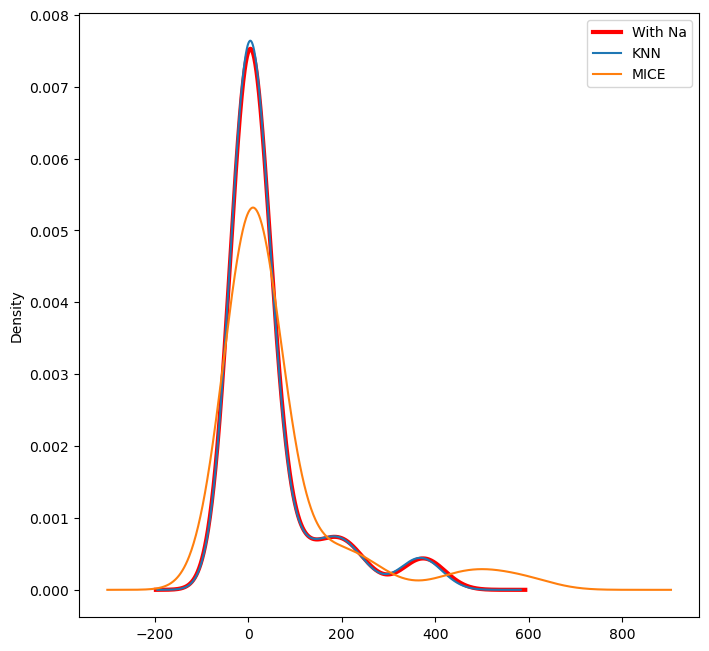

In [61]:
# plot the std of the features with more than 3% of missing values before and after imputation with knn and mice
feature_missing_sum = pd.DataFrame((X_train.isna()).sum())
percentage_missing_filter = 3/100
feature_filter = feature_missing_sum[feature_missing_sum[0]>=(len(X_train.loc[:,])*percentage_missing_filter)].index

print(len(feature_filter))

summary_with_na = X_train[feature_filter].describe(include='all')
feature_std_with_na = pd.DataFrame(summary_with_na.loc['std',:])
feature_std_sort_with_na = feature_std_with_na.sort_values(by=['std'])

summary_knn = X_train_KNN[feature_filter].describe(include='all')
feature_std_knn = pd.DataFrame(summary_knn.loc['std',:])
feature_std_sort_knn = feature_std_knn.sort_values(by=['std'])

summary_mice = X_train_MICE[feature_filter].describe(include='all')
feature_std_mice = pd.DataFrame(summary_mice.loc['std',:])
feature_std_sort_mice = feature_std_mice.sort_values(by=['std'])

feature_std_sort_with_na.iloc[:,0].plot(kind='kde',c='red',linewidth=3)
feature_std_sort_knn.iloc[:,0].plot(kind='kde')
feature_std_sort_mice.iloc[:,0].plot(kind='kde')
labels = ['With Na', 'KNN','MICE']
plt.legend(labels)

# -----------------------------IMPUTER knn-----------------------------------------------------------

### Visualizing using t-SNE

In [62]:


m = TSNE(learning_rate=50)

In [63]:
X_tsne = X_train_KNN.merge(y_lm, left_index= True, right_index= True)
tsne_features = m.fit_transform(X_tsne)
tsne_features = pd.DataFrame(tsne_features, columns=['x','y'])
tsne_features

,x,y
0,8.432953,11.962420
1,-0.895593,-3.928125
2,22.944868,-29.204361
3,-32.598534,1.335435
4,-25.056757,-12.948697
...,...,...
1248,-23.418903,-4.075339
1249,-4.169681,-24.688606
1250,-40.886604,10.846075
1251,0.452226,38.812035


<AxesSubplot:xlabel='x', ylabel='y'>

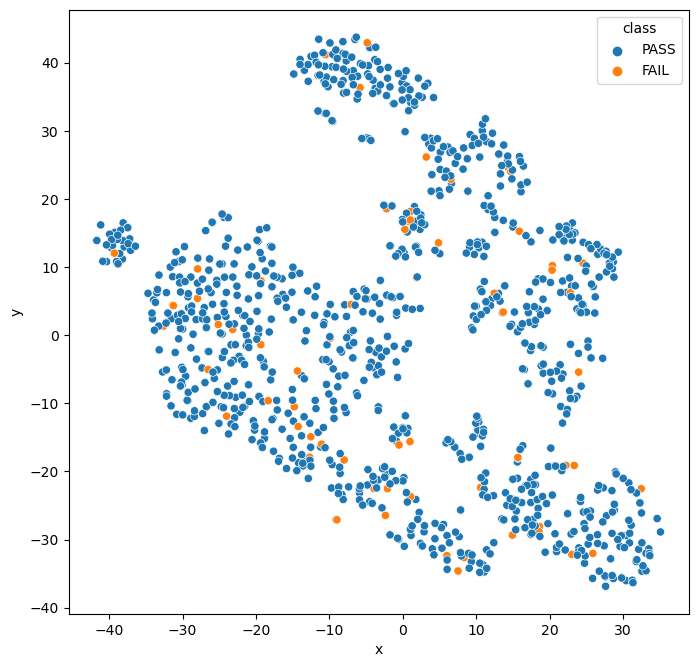

In [64]:
X_tsne['class'] = X_tsne['class'].replace({0: "PASS", 1: "FAIL"})
sns.scatterplot(data = tsne_features , x='x' , y='y', hue= X_tsne['class'], legend= True )


## 4.6. Feature Selection

### 4.6.1 Boruta

In [65]:
def FeatureSelection (X, y) :
    feature_names = np.array(X.columns)

    # define random forest classifier
    model = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
    model.fit(X, y)
    
    # define Boruta feature selection method
    feature_selector = BorutaPy(model, n_estimators='auto', verbose=2, random_state=1)

    # find all relevant features
    feature_selector.fit(X.to_numpy(),y)

    # check selected features
    feature_selector.support_

    # check ranking of features
    feature_selector.ranking_

    # zip feature names, ranks, and decisions 
    feature_ranks = list(zip(feature_names, 
                             feature_selector.ranking_, 
                             feature_selector.support_))

    # print the results
    for feat in feature_ranks:
        print('Feature: {:<30} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))
        
    final_features = list()
    indexes = np.where(feature_selector.support_ == True)
    for x in np.nditer(indexes):
        final_features.append(feature_names[x])
    print(final_features)
    
    
    # call transform() on X to filter it down to selected features
    return pd.DataFrame(X.filter(final_features)) , final_features


In [66]:
# apply Boruta and store selected features in the variable
X_train_KNN_Boruta , final_features_KNN = FeatureSelection(X_train_KNN,y_train)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	398
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	25
Rejected: 	398
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	25
Rejected: 	398
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	25
Rejected: 	398
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	22
Rejected: 	398
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	21
Rejected: 	399
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	21
Rejected: 	399
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	21
Rejected: 	399
Iteration: 	16 / 100
Confirmed: 	9
Tentat

#### 4.6.2 Overview of remaining features


In [67]:
# Descriptive statistics
X_train_KNN_Boruta.describe()

,feature034,feature060,feature066,feature104,feature113,feature126,feature127,feature131,feature153,feature161,feature296,feature432,feature461,feature511
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,8.822500,2.754707,26.823416,-0.009802,0.462427,1.182482,2.732830,0.746953,0.605628,461.145012,205.459324,17.759043,28.825333,52.412075
std,0.399954,8.137307,5.761799,0.002825,0.005511,0.265070,0.203994,0.080698,0.493665,241.840673,107.401994,12.506033,11.882884,24.527152
min,7.603200,-21.205500,8.763600,-0.018500,0.398900,0.605500,2.340000,0.501300,0.154400,28.000000,13.622900,1.239100,7.953400,0.000000
25%,8.577900,-1.880900,23.059600,-0.011800,0.460300,0.974400,2.575000,0.688700,0.371800,295.000000,130.306100,11.056900,20.363900,35.294100
50%,8.766200,0.882700,26.254000,-0.010100,0.462490,1.144000,2.735000,0.758600,0.469500,436.000000,194.561000,16.229300,26.336600,47.222200
75%,9.035500,4.381800,29.914500,-0.008100,0.464690,1.338000,2.857000,0.818700,0.693900,602.000000,266.046400,21.406800,35.356900,64.000000
max,10.963400,29.750900,49.023700,-0.000700,0.488500,2.022000,3.463000,0.888400,5.865800,2113.000000,997.684300,119.356000,70.261900,160.493800


In [68]:
#datatype and shape
print(X_train_KNN_Boruta.info())
print(X_train_KNN_Boruta.shape)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1253 entries, 567.0 to 645.0
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature034  1253 non-null   float64
 1   feature060  1253 non-null   float64
 2   feature066  1253 non-null   float64
 3   feature104  1253 non-null   float64
 4   feature113  1253 non-null   float64
 5   feature126  1253 non-null   float64
 6   feature127  1253 non-null   float64
 7   feature131  1253 non-null   float64
 8   feature153  1253 non-null   float64
 9   feature161  1253 non-null   float64
 10  feature296  1253 non-null   float64
 11  feature432  1253 non-null   float64
 12  feature461  1253 non-null   float64
 13  feature511  1253 non-null   float64
dtypes: float64(14)
memory usage: 179.1 KB
None
(1253, 14)


array([[<AxesSubplot:title={'center':'feature034'}>,
        <AxesSubplot:title={'center':'feature060'}>,
        <AxesSubplot:title={'center':'feature066'}>,
        <AxesSubplot:title={'center':'feature104'}>],
       [<AxesSubplot:title={'center':'feature113'}>,
        <AxesSubplot:title={'center':'feature126'}>,
        <AxesSubplot:title={'center':'feature127'}>,
        <AxesSubplot:title={'center':'feature131'}>],
       [<AxesSubplot:title={'center':'feature153'}>,
        <AxesSubplot:title={'center':'feature161'}>,
        <AxesSubplot:title={'center':'feature296'}>,
        <AxesSubplot:title={'center':'feature432'}>],
       [<AxesSubplot:title={'center':'feature461'}>,
        <AxesSubplot:title={'center':'feature511'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

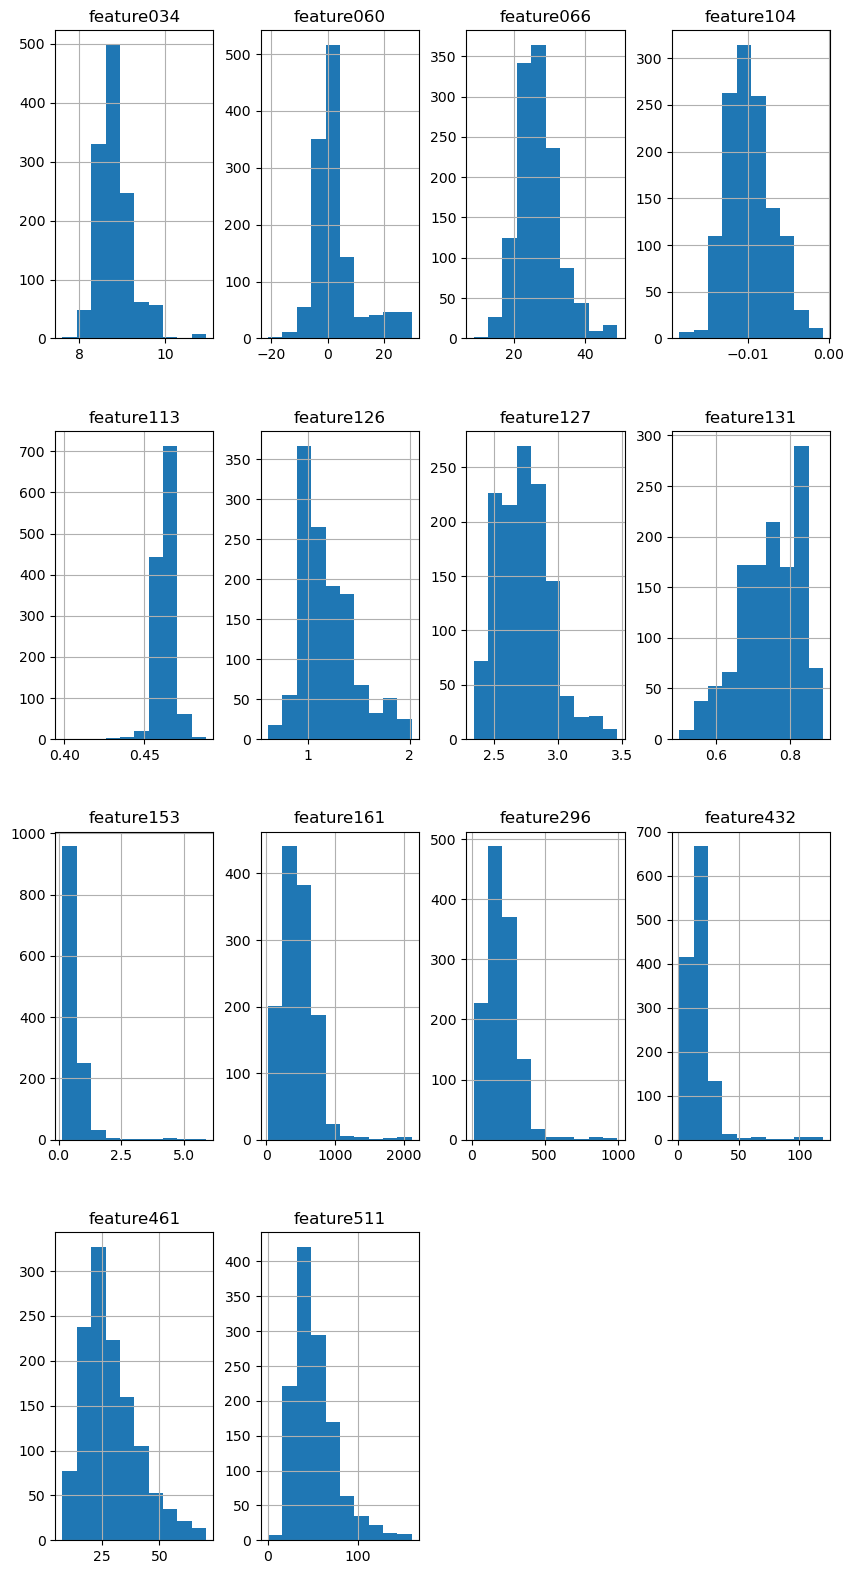

In [69]:
# Histogram of the features
X_train_KNN_Boruta.hist(figsize=(10,20))

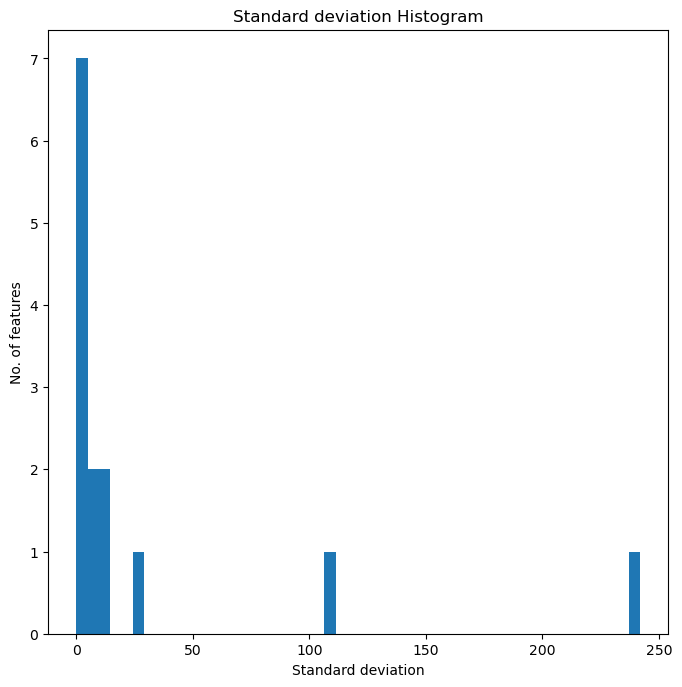

In [70]:
# Histogram of Standard Deviation of the remaining features
StandardDeviation(X_train_KNN_Boruta)

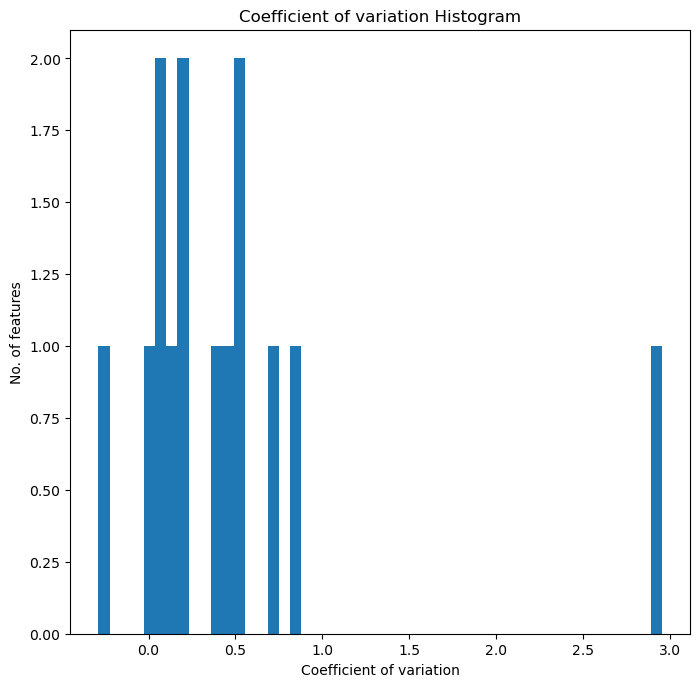

In [71]:
# Histogram of Coefficient of Standard Deviation of the remaining features
CoefficientOfVariation(X_train_KNN_Boruta)

In [72]:
# Correlation of the remaining features

# Heatmap of correlation
corr = pd.DataFrame(X_train_KNN_Boruta.corr())
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,feature034,feature060,feature066,feature104,feature113,feature126,feature127,feature131,feature153,feature161,feature296,feature432,feature461,feature511
feature034,1.00,0.15,0.09,0.13,0.15,-0.10,-0.01,0.02,0.03,0.03,0.03,0.03,0.08,0.08
feature060,0.15,1.00,-0.41,0.36,0.17,-0.18,-0.01,0.04,0.19,0.11,0.12,0.06,0.06,0.30
feature066,0.09,-0.41,1.00,0.14,0.10,-0.02,-0.00,0.02,-0.04,-0.05,-0.04,-0.00,0.05,0.11
feature104,0.13,0.36,0.14,1.00,0.14,-0.24,0.01,0.07,0.09,0.14,0.14,0.11,0.04,0.64
feature113,0.15,0.17,0.10,0.14,1.00,-0.03,-0.01,0.04,0.10,0.04,0.04,0.04,0.10,0.11
feature126,-0.10,-0.18,-0.02,-0.24,-0.03,1.00,-0.48,-0.61,-0.07,-0.07,-0.07,-0.06,0.09,-0.20
feature127,-0.01,-0.01,-0.00,0.01,-0.01,-0.48,1.00,0.65,-0.01,-0.02,-0.02,0.00,-0.09,0.01
feature131,0.02,0.04,0.02,0.07,0.04,-0.61,0.65,1.00,-0.01,0.03,0.03,0.02,-0.10,0.08
feature153,0.03,0.19,-0.04,0.09,0.10,-0.07,-0.01,-0.01,1.00,0.06,0.07,0.12,0.03,0.12
feature161,0.03,0.11,-0.05,0.14,0.04,-0.07,-0.02,0.03,0.06,1.00,0.99,0.68,-0.03,0.06


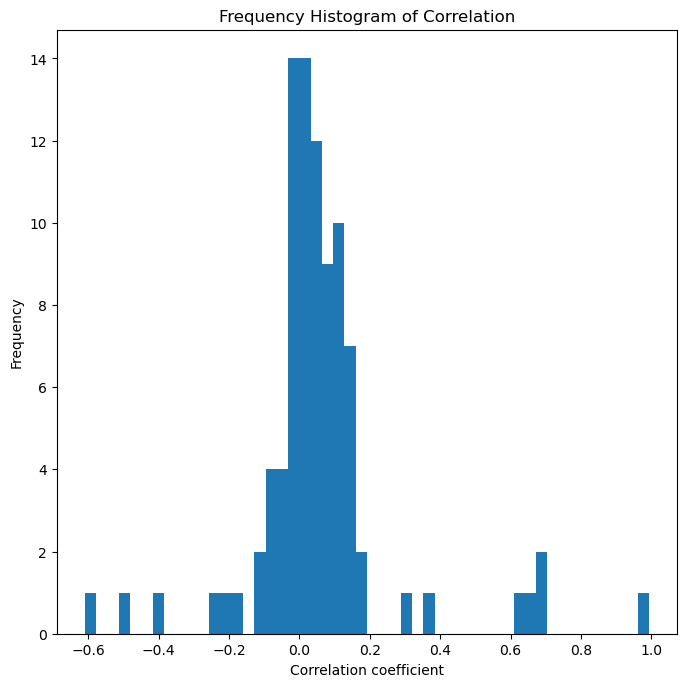

In [73]:
# Histogram of the Correlation of the remaining features
correlation(X_train_KNN_Boruta)

## 5. Modeling

### 5.1. Balancing

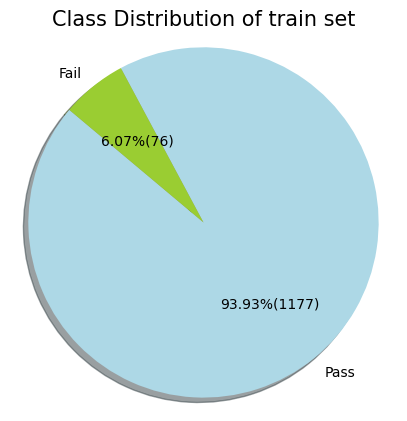

In [74]:
#Pie chart of the imbalanced train data
ClassDistributionGraph(y_train, 'Class Distribution of train set')

In [75]:
# Sample the dataset
from imblearn.over_sampling import SMOTE

y_train_KNN_Boruta = y_train.copy(deep=True)
oversample = SMOTE()
X_train_KNN_Boruta, y_train_KNN_Boruta = oversample.fit_resample(X_train_KNN_Boruta, y_train_KNN_Boruta)

In [76]:
# summarize the new class distribution
counter = Counter(y_train_KNN_Boruta)
print(counter)

Counter({'PASS': 1177, 'FAIL': 1177})


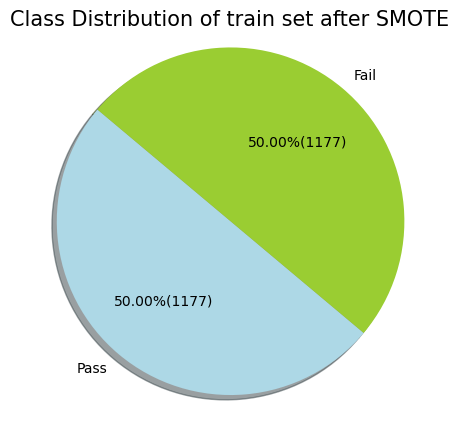

In [77]:
ClassDistributionGraph(y_train_KNN_Boruta, 'Class Distribution of train set after SMOTE')

### 5.2 Preparing Test data

In [78]:
## Rough feature reduction

X_test_KNN_Boruta = X_test.copy(deep=True)
X_test_KNN_Boruta = X_test_KNN_Boruta.drop(columns= 'timestamp')
X_test_KNN_Boruta = X_test_KNN_Boruta.drop(columns= single_value_columns)
X_test_KNN_Boruta = X_test_KNN_Boruta.drop(columns= missing_value_cols)
X_test_KNN_Boruta = X_test_KNN_Boruta.drop(columns= features_least_volatile)
                    
# Outlier treatment 
X_test_KNN_Boruta = Outlier(X_test_KNN_Boruta,'NaN')

## Missing Value imputation
X_test_KNN_Boruta.iloc[:,:] = pd.DataFrame(MissingValueImputation(X_test_KNN_Boruta,'KNN',))

## Feature selection 
X_test_KNN_Boruta = X_test_KNN_Boruta.filter(final_features_KNN)

#SMOTE


X_test_KNN_Boruta



Number of Outliers :  1399


,feature034,feature060,feature066,feature104,feature113,feature126,feature127,feature131,feature153,feature161,feature296,feature432,feature461,feature511
ID,,,,,,,,,,,,,,
766.0,8.7073,-0.2418,24.7587,-0.0099,0.46410,1.0590,2.915,0.7697,0.6599,591.0,244.8106,20.8815,18.7707,57.7947
1231.0,8.8355,4.6891,14.6060,-0.0088,0.46181,1.1350,2.545,0.7284,0.4913,328.0,153.2971,12.7478,53.9906,52.4964
723.0,8.3436,1.7618,23.5304,-0.0101,0.45640,0.9554,2.864,0.7585,0.4779,650.0,266.3136,21.5178,10.7413,45.6576
1470.0,9.7137,0.0064,23.1671,-0.0126,0.46192,1.2200,2.897,0.8522,0.2103,95.0,43.8824,3.7721,37.5476,27.8884
401.0,8.6013,4.5027,22.3374,-0.0057,0.45580,1.3470,2.481,0.6834,1.3767,314.0,137.3132,12.1741,17.4238,54.0305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28.0,8.9336,17.3873,27.4102,-0.0078,0.47600,0.9554,3.002,0.6287,0.5337,420.0,177.2362,15.3734,30.4356,69.6774
584.0,8.7994,11.2909,13.8957,-0.0111,0.45910,1.1350,2.467,0.6802,0.4713,517.0,232.9440,19.3000,14.2373,39.5062
953.0,8.6695,0.4200,26.5186,-0.0087,0.45900,1.1820,2.735,0.8349,0.2743,276.0,114.3343,10.6625,29.9729,50.4298


### 5.4 Model Evaluation


In [79]:
# fucntion to build , predit and assess the model
def run_ML_process(X, y, X_test, y_test, clf):
    #scaling
    #scaler = StandardScaler()
    #scaler.fit(X)
    #X = pd.DataFrame(scaler.transform(X), index=X.index, columns=X.columns)
    #X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    #Evaluation using a 10-fold CV
    scores = cross_val_score(clf, X, y, cv=10, scoring = 'accuracy')
    print('Averace Accuracy:', scores.mean())

    #fit
    clf.fit(X, y)
    
    #predict
    y_pred_test = clf.predict(X_test)
    
    # View accuracy score
    print('Accuracy: ', accuracy_score(y_test, y_pred_test))
    
    #Plot confussion matrix
    plt.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots(figsize=(8, 8))
    plot_confusion_matrix(clf, X_test, y_test, ax=ax, cmap=plt.cm.Blues)
    
    # View the classification report for test data and predictions
    print(classification_report(y_test, y_pred_test))
    

### 5.3.1 Random Forest

Averace Accuracy: 0.9532744320230797
Accuracy:  0.8726114649681529
              precision    recall  f1-score   support

        FAIL       0.08      0.11      0.09        19
        PASS       0.94      0.92      0.93       295

    accuracy                           0.87       314
   macro avg       0.51      0.51      0.51       314
weighted avg       0.89      0.87      0.88       314



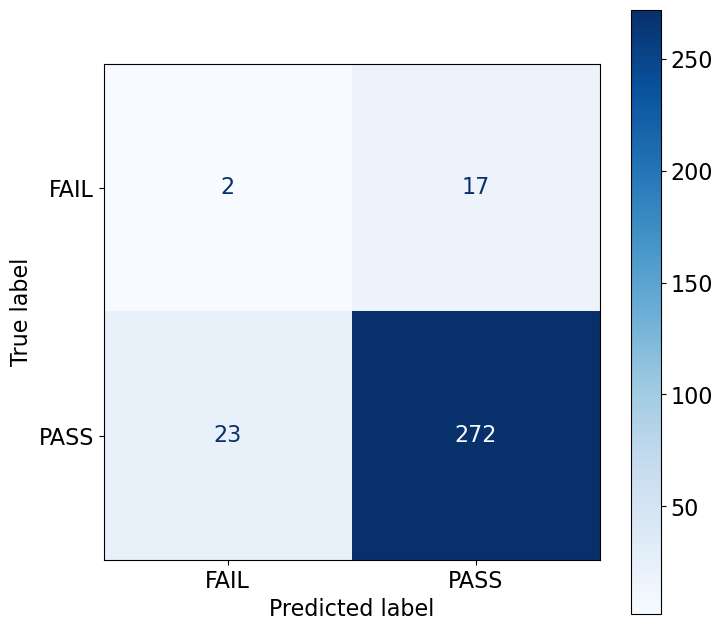

In [80]:
# Random Forest model
run_ML_process(X_train_KNN_Boruta, y_train_KNN_Boruta, X_test_KNN_Boruta, y_test, RandomForestClassifier())

## ---------------Imputer = MICE -----------------------------------------------------------------------------------------

#                                                     MICE

## Feature Selelction

#### Boruta

In [81]:
X_train_MICE_Boruta , final_features_MICE = FeatureSelection(X_train_MICE,y_train)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	427
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	407
Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	17
Rejected: 	407
Iteration: 	10 / 100
Confirmed: 	3
Tentative: 	17
Rejected: 	407
Iteration: 	11 / 100
Confirmed: 	3
Tentative: 	17
Rejected: 	407
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	16
Rejected: 	407
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	15
Rejected: 	408
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	15
Rejected: 	408
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	15
Rejected: 	408
Iteration: 	16 / 100
Confirmed: 	6
Tentat

In [82]:
X_train_MICE_Boruta


,feature034,feature060,feature065,feature066,feature104,feature113,feature126,feature127,feature131,feature461
ID,,,,,,,,,,
567.0,8.5288,1.4845,18.5155,25.4260,-0.0146,0.455500,0.9649,2.888,0.6627,22.7157
1261.0,9.0402,1.7273,18.2727,22.1740,-0.0124,0.356977,1.1540,2.627,0.7492,32.6879
1041.0,8.8581,-3.7509,23.7509,30.7593,-0.0086,0.498449,1.8340,2.658,0.5042,21.7993
1181.0,8.7782,1.3555,18.6445,22.2300,-0.0107,0.468000,1.0210,2.792,0.7931,36.7423
611.0,8.5615,2.3900,17.6100,25.5921,-0.0095,0.386964,0.8845,2.748,0.8080,15.0259
...,...,...,...,...,...,...,...,...,...,...
806.0,8.5862,-3.1227,23.1227,31.4849,-0.0111,0.442000,1.2390,2.511,0.6847,16.1068
1101.0,8.9818,0.1982,19.8018,23.4628,-0.0116,0.375315,1.4650,2.920,0.8037,18.7968
1469.0,8.6384,1.2518,18.7482,24.1495,-0.0112,0.385294,1.3800,2.765,0.7248,31.6738


### Overview of remaining features

In [83]:
# Descriptive statistics
X_train_MICE_Boruta.describe()

,feature034,feature060,feature065,feature066,feature104,feature113,feature126,feature127,feature131,feature461
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,8.823510,2.786285,20.532606,26.977787,-0.009899,0.460792,1.177018,2.722098,0.746243,29.131898
std,0.408141,8.409599,5.622140,8.094360,0.003290,0.041858,0.285691,0.391416,0.084987,12.685833
min,7.393245,-38.915849,-21.025663,-36.530909,-0.045648,0.265639,-0.451938,-1.784581,0.173077,7.953400
25%,8.577900,-1.948200,17.300900,22.991400,-0.011800,0.454300,0.974400,2.564000,0.688700,20.363900
50%,8.769600,0.860000,20.007300,26.254000,-0.010100,0.462600,1.135000,2.734000,0.759100,26.295600
75%,9.040200,4.415500,22.855500,30.013000,-0.008100,0.470100,1.338000,2.864000,0.820100,35.720100
max,10.963400,45.103290,70.412880,182.658946,0.002488,0.643415,3.006898,6.974917,0.999803,117.422837


In [84]:
#datatype and shape
print(X_train_MICE_Boruta.info())
print(X_train_MICE_Boruta.shape)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1253 entries, 567.0 to 645.0
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature034  1253 non-null   float64
 1   feature060  1253 non-null   float64
 2   feature065  1253 non-null   float64
 3   feature066  1253 non-null   float64
 4   feature104  1253 non-null   float64
 5   feature113  1253 non-null   float64
 6   feature126  1253 non-null   float64
 7   feature127  1253 non-null   float64
 8   feature131  1253 non-null   float64
 9   feature461  1253 non-null   float64
dtypes: float64(10)
memory usage: 140.0 KB
None
(1253, 10)


array([[<AxesSubplot:title={'center':'feature034'}>,
        <AxesSubplot:title={'center':'feature060'}>,
        <AxesSubplot:title={'center':'feature065'}>],
       [<AxesSubplot:title={'center':'feature066'}>,
        <AxesSubplot:title={'center':'feature104'}>,
        <AxesSubplot:title={'center':'feature113'}>],
       [<AxesSubplot:title={'center':'feature126'}>,
        <AxesSubplot:title={'center':'feature127'}>,
        <AxesSubplot:title={'center':'feature131'}>],
       [<AxesSubplot:title={'center':'feature461'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

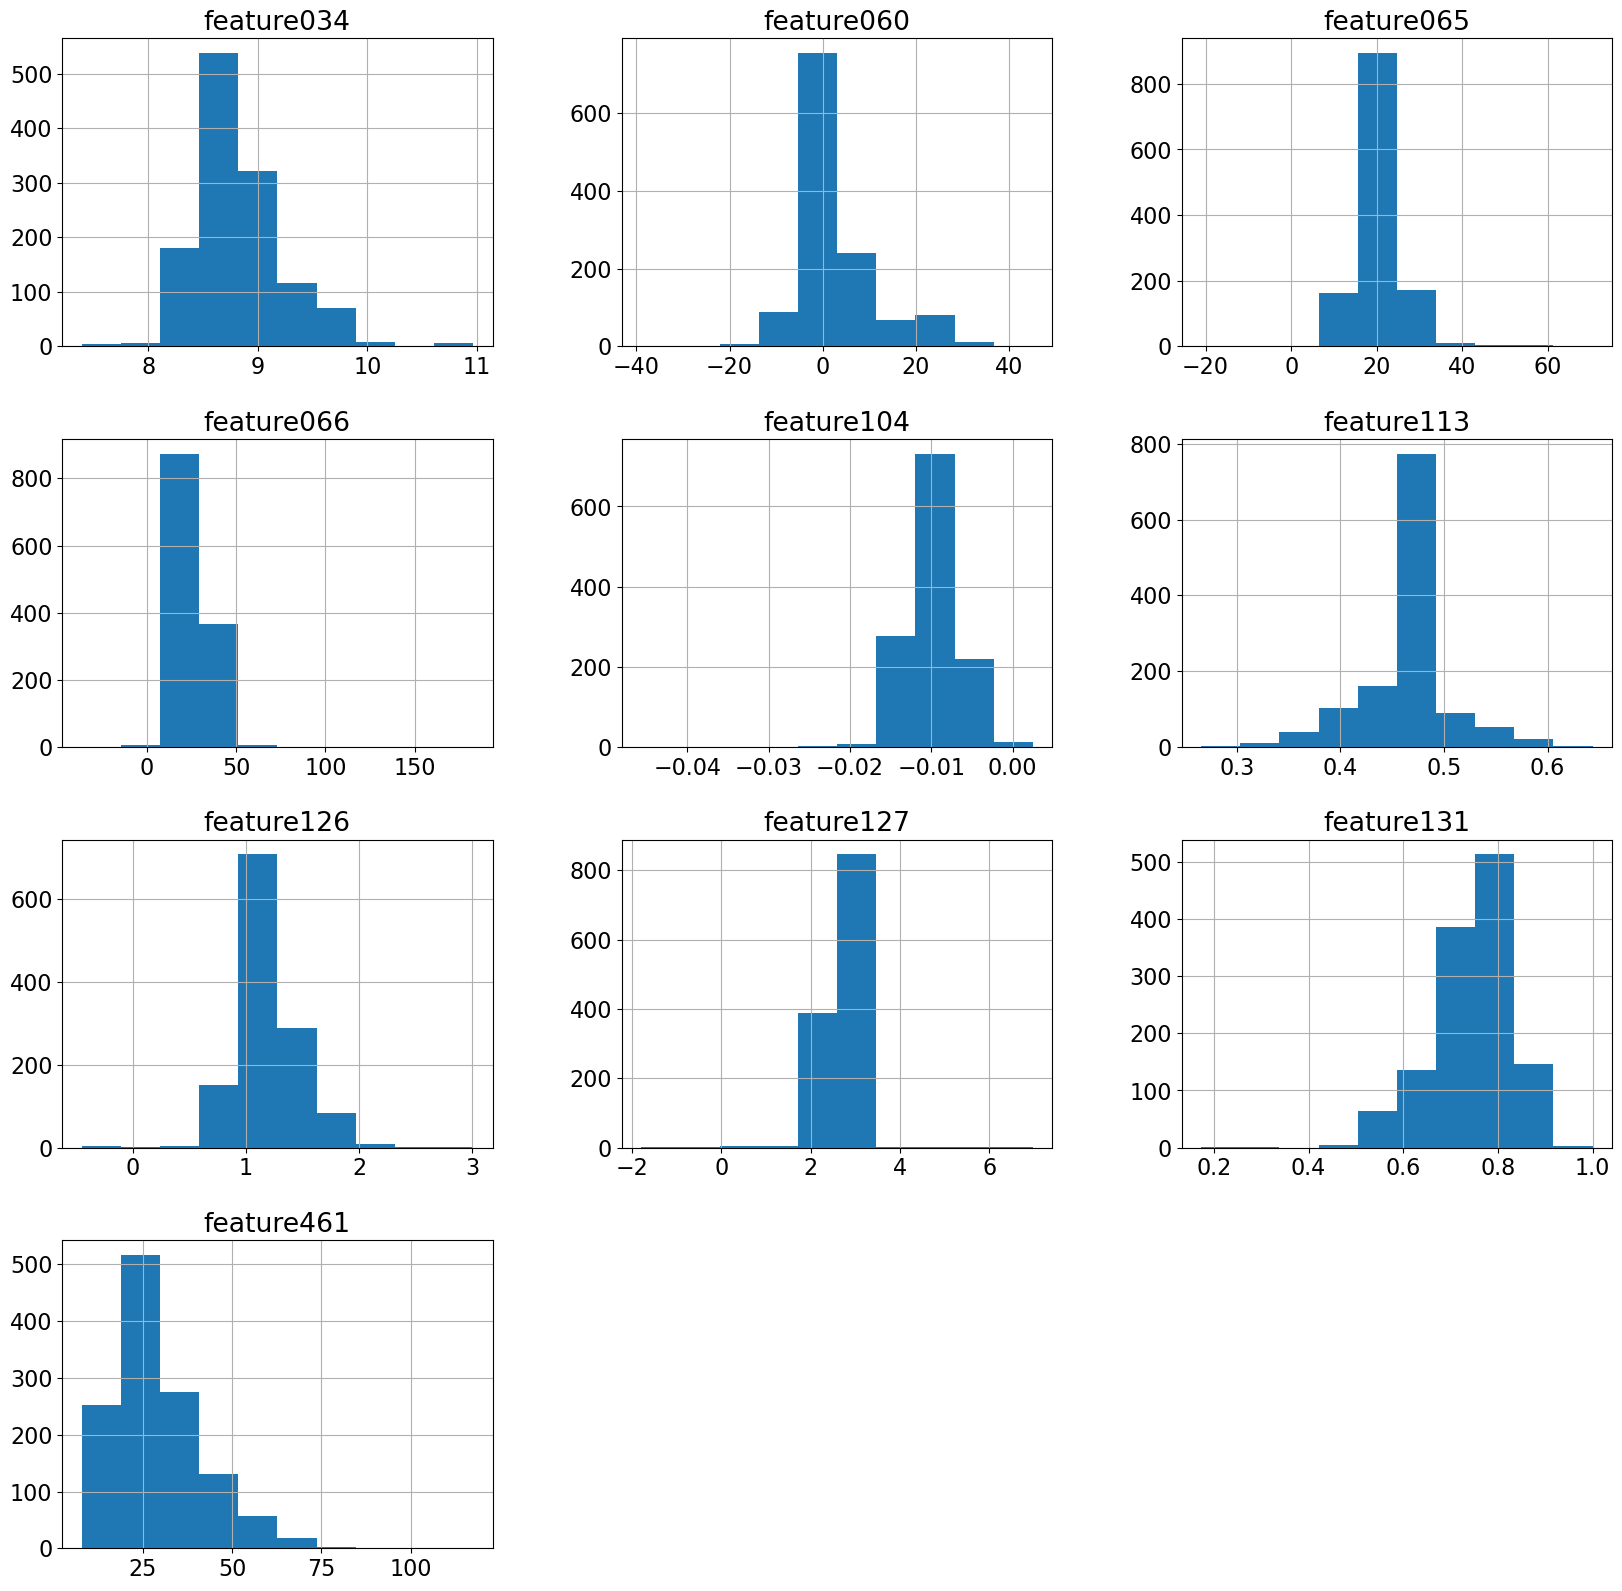

In [85]:
X_train_MICE_Boruta.hist(figsize=(20,20))

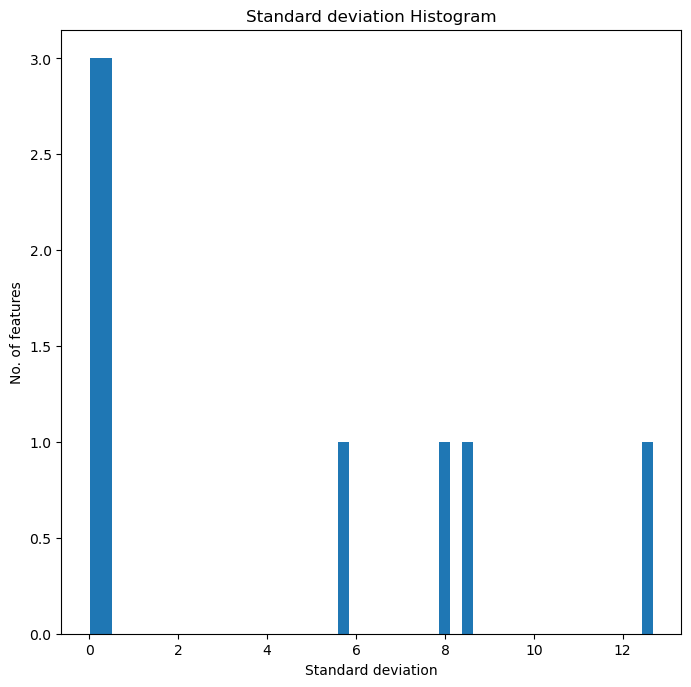

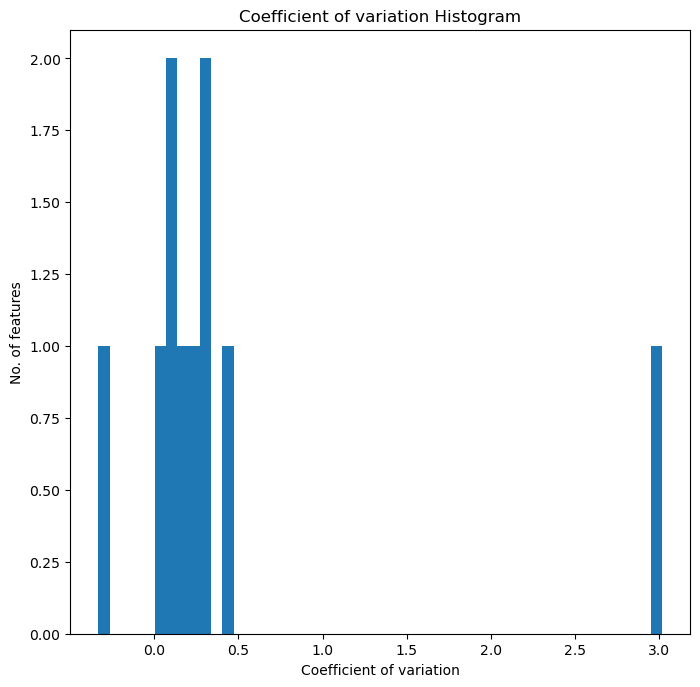

In [86]:
#checking std of features 

StandardDeviation(X_train_MICE_Boruta)

CoefficientOfVariation(X_train_MICE_Boruta)

In [87]:
#Correlation

# Heatmap of correlation
corr = pd.DataFrame(X_train_MICE_Boruta.corr())
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,feature034,feature060,feature065,feature066,feature104,feature113,feature126,feature127,feature131,feature461
feature034,1.00,0.15,0.06,0.07,0.12,0.02,-0.10,-0.00,0.03,0.06
feature060,0.15,1.00,-0.37,-0.31,0.30,0.03,-0.14,0.02,0.05,0.07
feature065,0.06,-0.37,1.00,0.72,0.09,0.00,-0.01,-0.02,0.02,0.05
feature066,0.07,-0.31,0.72,1.00,0.10,0.08,-0.02,-0.03,0.01,0.01
feature104,0.12,0.30,0.09,0.10,1.00,0.04,-0.22,-0.02,0.03,0.03
feature113,0.02,0.03,0.00,0.08,0.04,1.00,-0.01,-0.00,0.02,0.06
feature126,-0.10,-0.14,-0.01,-0.02,-0.22,-0.01,1.00,-0.23,-0.51,0.08
feature127,-0.00,0.02,-0.02,-0.03,-0.02,-0.00,-0.23,1.00,0.33,-0.12
feature131,0.03,0.05,0.02,0.01,0.03,0.02,-0.51,0.33,1.00,-0.09
feature461,0.06,0.07,0.05,0.01,0.03,0.06,0.08,-0.12,-0.09,1.00


## SMOTE

In [88]:
# transform the dataset
from imblearn.over_sampling import SMOTE

oversample_MICE = SMOTE()
X_train_MICE_Boruta , y_train_MICE_Boruta = oversample.fit_resample(X_train_MICE_Boruta, y_train)

In [89]:
from collections import Counter
# summarize the new class distribution
counter = Counter(y_train_MICE_Boruta)
print(counter)

Counter({'PASS': 1177, 'FAIL': 1177})


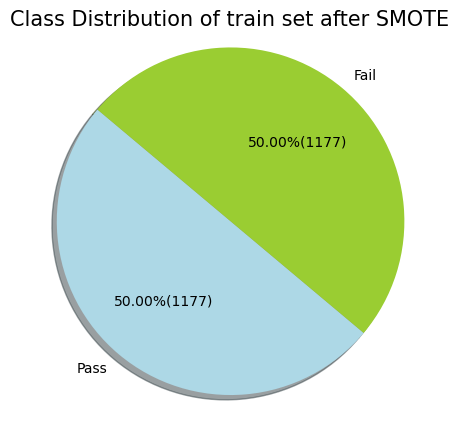

In [90]:
ClassDistributionGraph(y_train_KNN_Boruta, 'Class Distribution of train set after SMOTE')

## Preparing test data

In [91]:
## Rough feature reduction
X_test_MICE_Boruta = X_test.drop(columns = 'timestamp')
X_test_MICE_Boruta = X_test_MICE_Boruta.drop(columns = single_value_columns)
X_test_MICE_Boruta = X_test_MICE_Boruta.drop(columns = missing_value_cols)
X_test_MICE_Boruta = X_test_MICE_Boruta.drop(columns = features_least_volatile)


In [92]:
# Outlier treatment 
X_test_MICE_Boruta = Outlier(X_test_MICE_Boruta, 'NaN')

## Missing Value imputation
X_test_MICE_Boruta.iloc[:,:] = pd.DataFrame(MissingValueImputation(X_test_MICE_Boruta,'MICE'))

## Feature selection 
X_test_MICE_Boruta = X_test_MICE_Boruta.filter(final_features_MICE)

X_test_MICE_Boruta


Number of Outliers :  1399


,feature034,feature060,feature065,feature066,feature104,feature113,feature126,feature127,feature131,feature461
ID,,,,,,,,,,
766.0,8.7073,-0.2418,20.2418,24.7587,-0.0099,0.464100,1.0590,2.915,0.7697,18.7707
1231.0,8.8355,4.6891,15.3109,14.6060,-0.0088,0.523029,1.1350,2.545,0.7284,53.9906
723.0,8.3436,1.7618,18.2382,23.5304,-0.0101,0.456400,0.9554,2.864,0.7585,10.7413
1470.0,9.7137,0.0064,19.9936,23.1671,-0.0126,0.436667,1.2200,2.897,0.8522,37.5476
401.0,8.6013,4.5027,15.4973,22.3374,-0.0057,0.455800,1.3470,2.481,0.6834,17.4238
...,...,...,...,...,...,...,...,...,...,...
28.0,8.9336,17.3873,22.6127,27.4102,-0.0078,0.476000,0.9554,3.002,0.6287,30.4356
584.0,8.7994,11.2909,8.7091,13.8957,-0.0111,0.459100,1.1350,2.467,0.6802,14.2373
953.0,8.6695,0.4200,19.5800,26.5186,-0.0087,0.459000,1.1820,2.735,0.8349,29.9729


## Model

Averace Accuracy: 0.9541164803461955
Accuracy:  0.9076433121019108
              precision    recall  f1-score   support

        FAIL       0.25      0.26      0.26        19
        PASS       0.95      0.95      0.95       295

    accuracy                           0.91       314
   macro avg       0.60      0.61      0.60       314
weighted avg       0.91      0.91      0.91       314



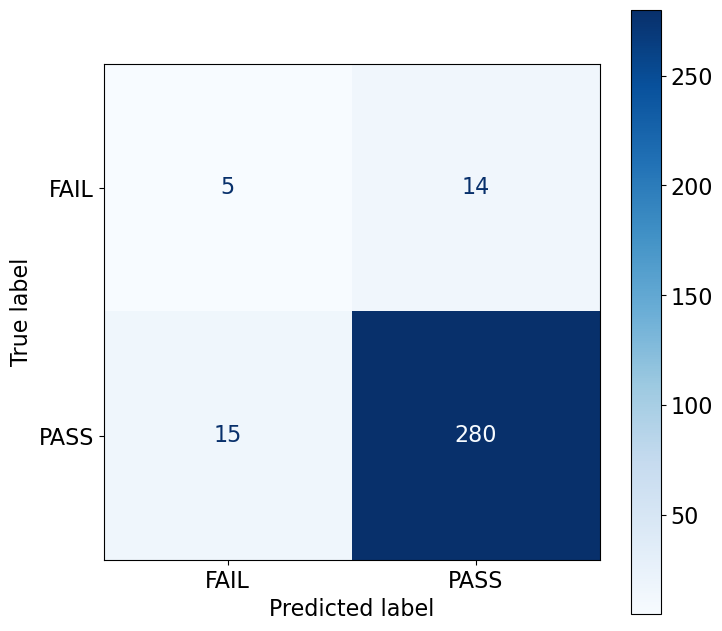

In [93]:
#Random forest
run_ML_process(X_train_MICE_Boruta, y_train_MICE_Boruta, X_test_MICE_Boruta, y_test, RandomForestClassifier() )